### 2.2. Data preprocessing

*The pandas library can be used tp extracte messy data stored in arbitrary formats, and prepocess it to suit our needs.*

#### 2.2.1. Reading the Dataset

In [2]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
                NA,NA,127500
                2,NA,106000
                4,Slate,178100
                NA,NA,140000''')

In [3]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

             NumRooms RoofType   Price
0                  NA      NaN  127500
1                   2      NaN  106000
2                   4    Slate  178100
3                  NA      NaN  140000


#### 2.2.2. Data Preparation

In [4]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
print(inputs)

# Convert categorical variable into dummy/indicator variables
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

             NumRooms RoofType
0                  NA      NaN
1                   2      NaN
2                   4    Slate
3                  NA      NaN


,NumRooms_ 2,NumRooms_ 4,NumRooms_ NA,NumRooms_nan,RoofType_Slate,RoofType_nan
0,0,0,1,0,0,1
1,1,0,0,0,0,1
2,0,1,0,0,1,0
3,0,0,1,0,0,1


In [5]:
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms_ 2,NumRooms_ 4,NumRooms_ NA,NumRooms_nan,RoofType_Slate,RoofType_nan
0,0,0,1,0,0,1
1,1,0,0,0,0,1
2,0,1,0,0,1,0
3,0,0,1,0,0,1


#### 2.2.3. Conversion to the Tensor Format

In [6]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[0., 0., 1., 0., 0., 1.],
         [1., 0., 0., 0., 0., 1.],
         [0., 1., 0., 0., 1., 0.],
         [0., 0., 1., 0., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

#### 2.2.4. Discussion

*Data visualization tools such as seaborn, Bokeh, or matplotlib can help you to manually inspect the data and develop intuitions about the type of problems you may need to address*

#### 2.2.5. Exercises

In [7]:
# Ex 1
import os
import pandas as pd
data_file = os.path.join('..', 'data', 'adult/adult.data')
data = pd.read_csv(data_file)
data.tail(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
data.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [17]:
missing_fraction = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'missing fraction': missing_fraction})
missing_value_df.reset_index(drop=True)

,column_name,missing fraction
0,39,0.0
1,State-gov,0.0
2,77516,0.0
3,Bachelors,0.0
4,13,0.0
5,Never-married,0.0
6,Adm-clerical,0.0
7,Not-in-family,0.0
8,White,0.0
9,Male,0.0


In [36]:
# Ex 2
print(list(data.columns))
print(data[['39', ' State-gov']].head(2))

['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0', ' 40', ' United-States', ' <=50K']
   39          State-gov
0  50   Self-emp-not-inc
1  38            Private


**Ex 3 - Quora**

-> Personal laptop depends on RAM to load the entire data.

-> There are a few approaches you can take to process large data sets on a laptop without loading the entire file into memory:

1. Use a streaming data processing library: Tools like Dask, Vaex, or Modin allow you to process data in a streaming fashion, reading and processing the data in smaller chunks rather than loading the entire dataset into memory at once. This can be particularly helpful for CSV files larger than your available RAM.

2. Leverage out-of-core processing: Out-of-core processing techniques involve reading and processing the data in smaller batches, writing intermediate results to disk, and then combining the results. This allows you to work with datasets that exceed your available RAM. Libraries like Dask and Vaex provide out-of-core processing capabilities.

3. Partition the data and process in parallel: You can split the 1GB CSV file into smaller chunks, process each chunk in parallel (e.g., using Pandas' apply_async or map functions), and then combine the results. This allows you to leverage the processing power of multiple CPU cores on your laptop.

4. Use a database or data warehouse: If the data is structured, you can load it into a database or data warehouse (e.g., SQLite, PostgreSQL, or a cloud-based service) and use SQL queries to perform the necessary data processing and analysis. This can be more efficient than loading the entire dataset into memory.

5. Leverage cloud-based data processing services: If your laptop's resources are still insufficient, you can explore cloud-based data processing services like AWS Glue, Google Dataflow, or Azure Databricks, which can handle large-scale data processing tasks more efficiently.

The specific approach you choose will depend on the complexity of your data mining task, the structure and format of your data, and the resources available on your laptop. Start by trying the streaming data processing libraries, as they can often provide a good balance between performance and ease of use.

In [43]:
# Ex 3
%time
import tracemalloc
tracemalloc.start()

data_file = os.path.join('..', 'data', 'adult/adult.data')
data = pd.read_csv(data_file)

print(tracemalloc.get_traced_memory())
tracemalloc.stop()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 15 µs
(3922562, 7854526)


In [41]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

Ex 4 -> Ex 3

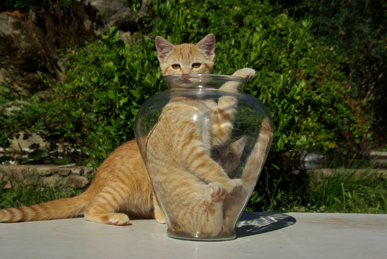

In [50]:
# Ex 5
from PIL import Image
im = Image.open(os.path.join('..', 'JupyterAI', 'assets/cat.jpg'))
im.resize((int(im.size[0]/10), int(im.size[1]/10)))